# Dealing with missing values

Dealing with missing values is a common challenge in data analysis and modelling. 

Missing data can occur for various reasons, including data entry errors, equipment failure, or simply because the data was not collected. Failing to handle missing data appropriately can lead to biased or inaccurate results. It may negatively impact the performance of machine learning models. 

This notebook will explore different strategies for handling missing data in Pandas, including removing missing data, imputing missing values with means or medians, and using advanced imputation techniques. 

## How To

In [6]:
import pandas as pd
import missingno as msno

In [13]:
df = pd.read_csv("data/housing.csv")

<AxesSubplot:>

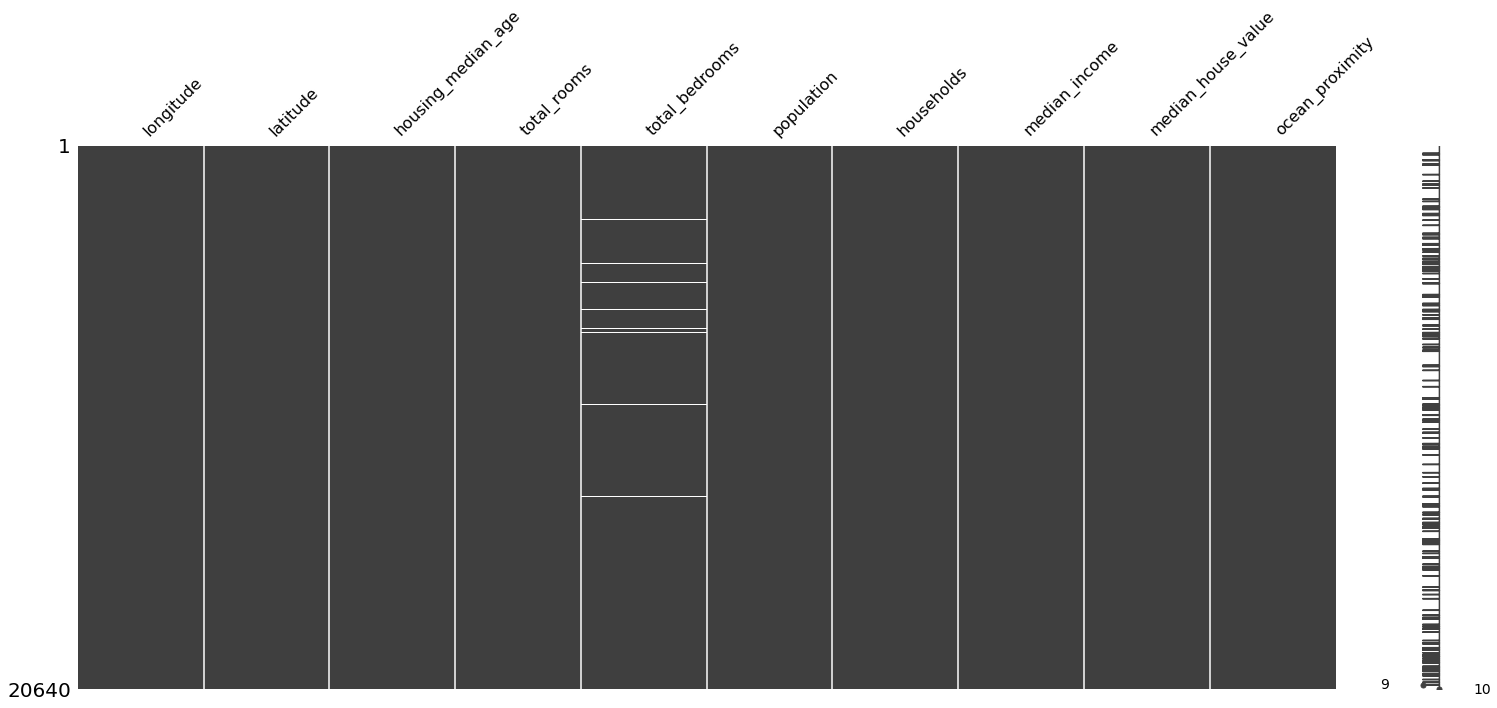

In [14]:
msno.matrix(df)

In [19]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:>

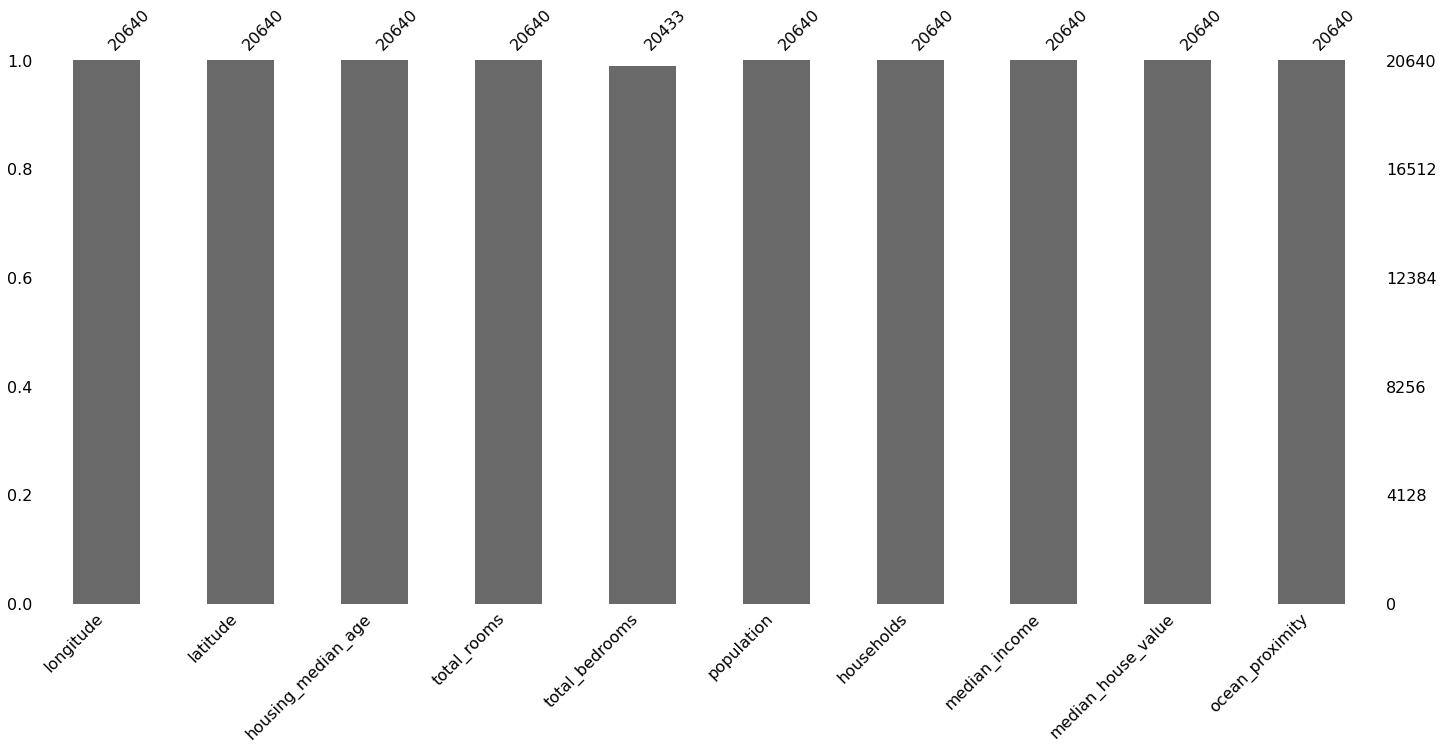

In [4]:
msno.bar(df)

In [3]:
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")

In [7]:
collisions.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",NaN,NaN,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [8]:
import numpy as np
collisions = collisions.replace("nan", np.nan)

pd.read_csv("", na_values=["nan", -999.25])

<AxesSubplot:>

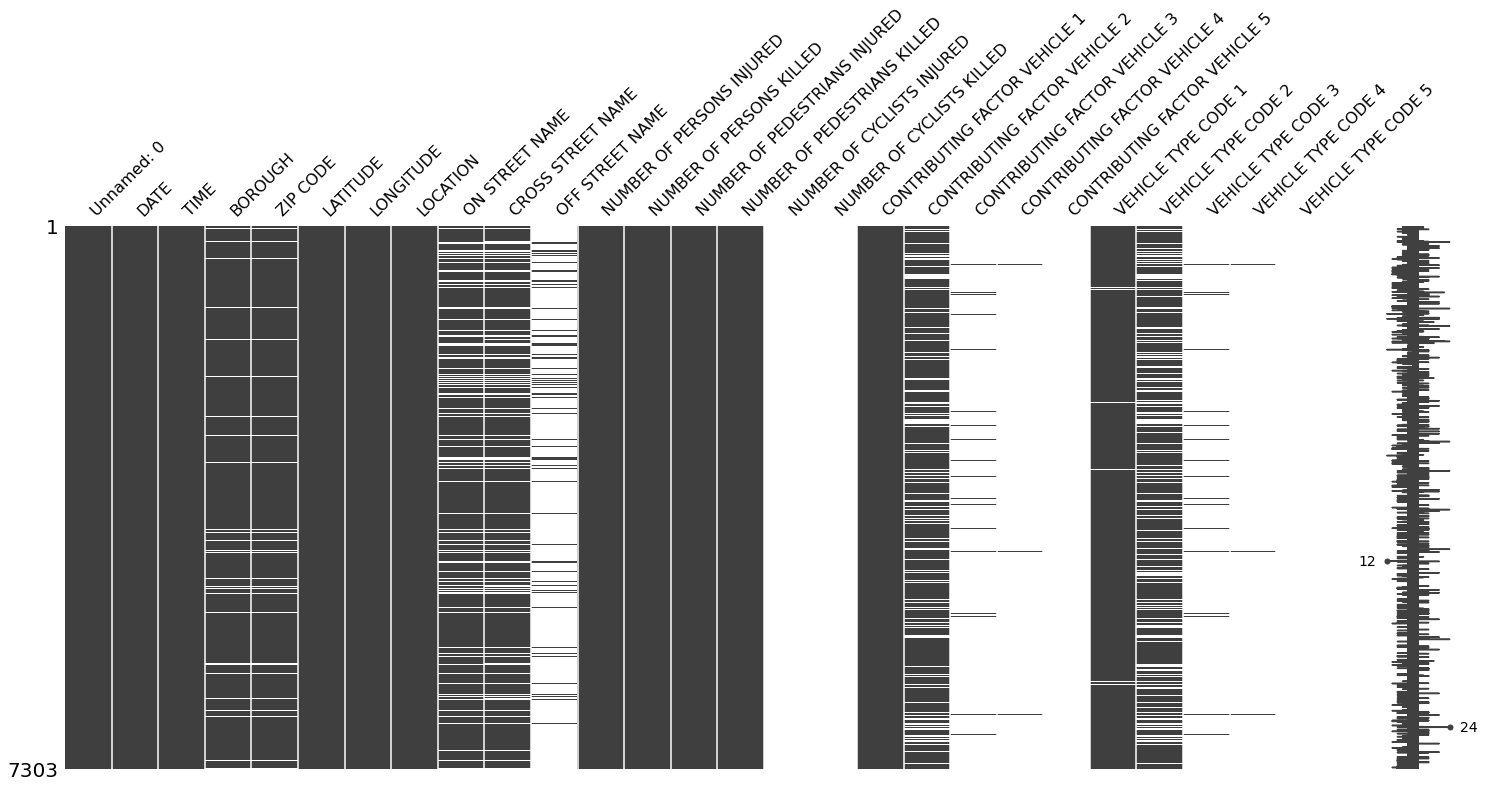

In [9]:
msno.matrix(collisions)

<AxesSubplot:>

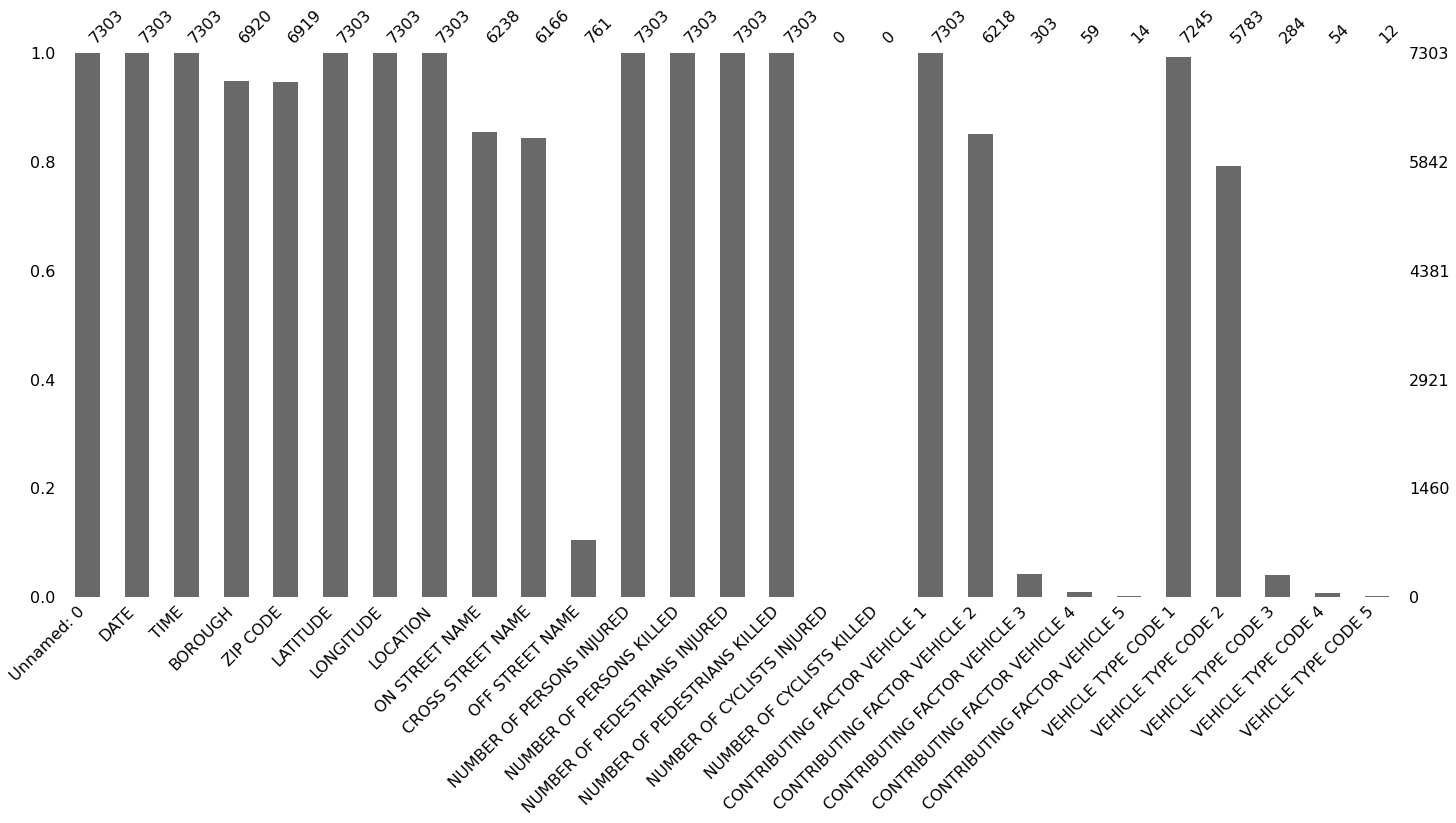

In [10]:
msno.bar(collisions)

<AxesSubplot:>

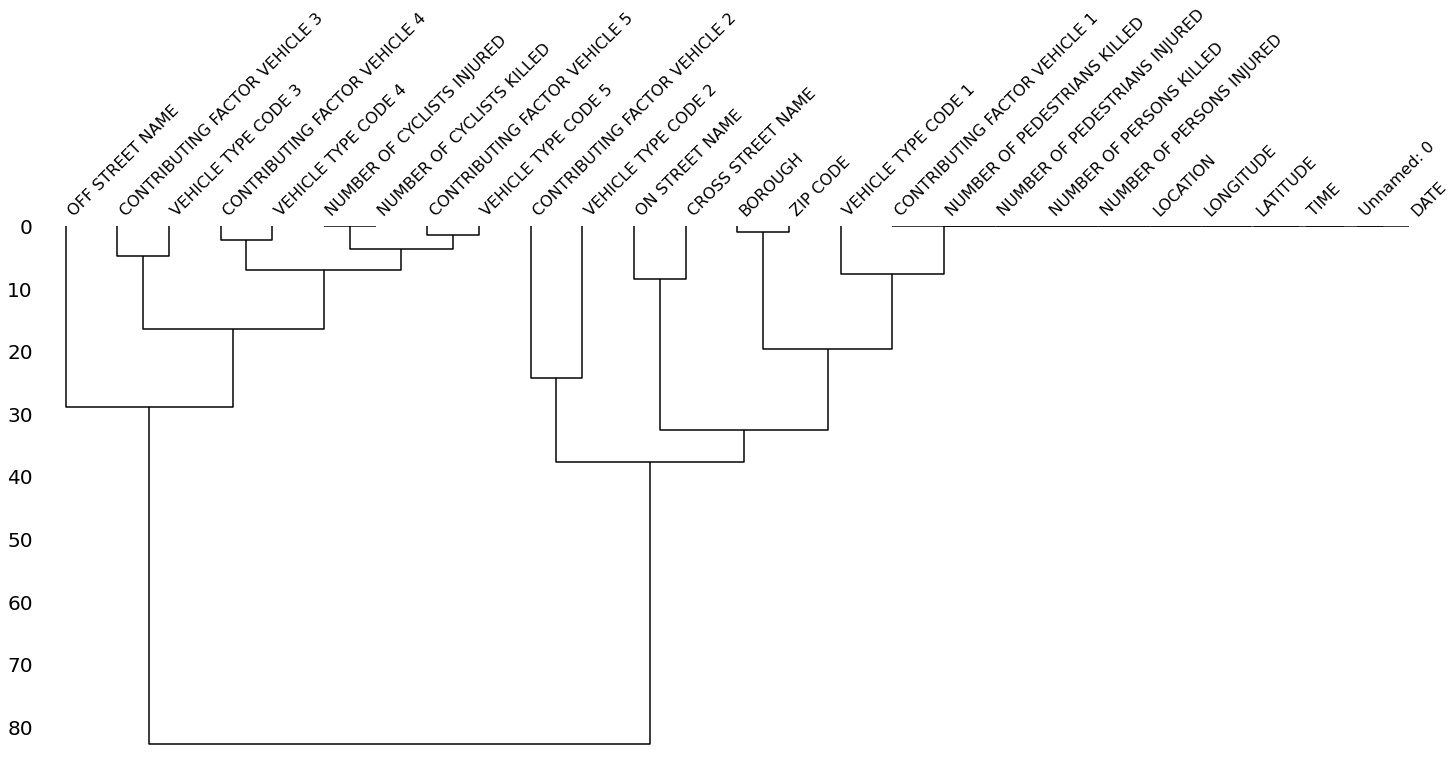

In [11]:
msno.dendrogram(collisions)

## Imputing missing values

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
df["total_bedrooms_corrected"] = df["total_bedrooms"] # copy
df["total_bedrooms_corrected"].fillna(df["total_bedrooms"].median(), inplace=True)

In [18]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
total_bedrooms_corrected      0
dtype: int64

In [21]:
df[["total_bedrooms", "total_bedrooms_corrected"]].head()

,total_bedrooms,total_bedrooms_corrected
0,129.0,129.0
1,1106.0,1106.0
2,190.0,190.0
3,235.0,235.0
4,280.0,280.0


## Scikit Learn Imputation

In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
median_imp = imp.fit_transform(df[["total_bedrooms"]])

In [25]:
median_imp == df[["total_bedrooms_corrected"]]

,total_bedrooms_corrected
0,True
1,True
2,True
3,True
4,True
...,...
20635,True
20636,True
20637,True
20638,True


## Exercise
Explore missingno with the NYC collision dataset.

In [ ]:
!pip install quilt
!quilt install ResidentMario/missingno_data

## Additional Resources

- [Pandas Documentation - Dealing with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
- [Towards Data Science - Imputation](https://towardsdatascience.com/pandas-tricks-for-imputing-missing-data-63da3d14c0d6)
- [Scikit-Learn Imputation](https://scikit-learn.org/stable/modules/impute.html)